In [8]:
%matplotlib inline
from scipy.io import wavfile
import pandas as pd
import datetime
from open_read import get_wavs
import matplotlib.pyplot as plt
import numpy as np 
from math import floor


def parse_file_name(file_name, how='list'):
    types = ['CINMS', 'DCPP']
    if file_name[0:5] == types[0]:
        first = file_name[0:5]
        extra = file_name[5:8]
        second = file_name[9:12]
        third = file_name[13:19]
        forth = file_name[20:26]
    elif file_name[0:4] == types[1]:
        first = file_name[0:4]
        extra = file_name[4:7]
        second = file_name[8:11]
        third = file_name[12:18]
        forth = file_name[19:25]
    else:
        raise Exception
    if how == 'str':
        return '%s %s 20%s-%s-%s %s:%s:%s' % (first, second, third[0:2], third[2:4], third[4:6],
                                              forth[0:2], forth[2:4], forth[4:6])
    elif how == 'list':
        return first, second, third[0:2], third[2:4], third[4:6], forth[0:2], forth[2:4], forth[4:6]
    else:
        loc = first
        opt = extra
        date_time = datetime.datetime.strptime('20%s-%s-%s %s:%s:%s' % (third[0:2], third[2:4], third[4:6],
                                                                        forth[0:2], forth[2:4], forth[4:6]),
                                               '%Y-%m-%d %H:%M:%S')
        return loc, opt, date_time

In [2]:

label_path = 'C:\\Users\\jorge\\DatasetsTFM\\2015DCLDEWorkshop\\AnalystAnnotations\\SocalLFDevelopmentData\\CINMS-B.csv'

audio_path = 'C:\\Users\\jorge\\DatasetsTFM\\2015DCLDEWorkshop\\SocalLFDevelopmentData\\CINMS18B_summer\\CINMS18B_d06_120626_214731.d100.x.wav'

In [3]:
labels = pd.read_csv(label_path, header=None, names=['Location', 'Opt', 'Whale', 'Start', 'End', 'Call'])

labels['Start'] = pd.to_datetime(labels['Start'], 'raise')
labels['End'] = pd.to_datetime(labels['End'], 'raise')

In [4]:
labels.sort_values(by='Start').head()

,Location,Opt,Whale,Start,End,Call
0,CINMS,B,Bm,2011-12-03 07:13:30.500,2011-12-03 07:13:33.400,D
1,CINMS,B,Bp,2011-12-06 06:01:46.000,2011-12-06 06:01:47.100,40Hz
2,CINMS,B,Bp,2011-12-06 06:06:36.400,2011-12-06 06:06:37.700,40Hz
3,CINMS,B,Bp,2011-12-06 06:09:11.900,2011-12-06 06:09:13.400,40Hz
4,CINMS,B,Bp,2011-12-06 06:13:07.700,2011-12-06 06:13:09.500,40Hz


In [5]:
parse_file_name('CINMS18B_d06_120626_214731.d100.x.wav', how='good')

('CINMS', '18B', datetime.datetime(2012, 6, 26, 21, 47, 31))

In [11]:
fs, data = wavfile.read(audio_path)
agua = 60*60*fs
data = data[:agua]
print(data.shape)

(7200000,)


In [13]:
display('Duración del audio de %d horas y %.2f minutos.' % (data.shape[0]/fs/60//60, data.shape[0]/fs/60%60))

'Duración del audio de 1 horas y 0.00 minutos.'

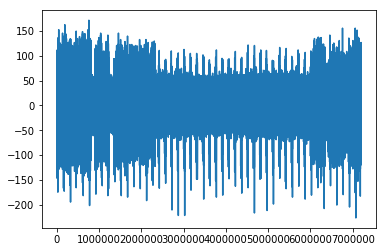

In [27]:
from math import floor
seconds_start = (labels[labels['Start']>datetime.datetime(2012, 6, 26, 21, 47, 31)].Start.iloc[0] - datetime.datetime(2012, 6, 26, 21, 47, 31)).seconds
seconds_end = (labels[labels['Start']>datetime.datetime(2012, 6, 26, 21, 47, 31)].End.iloc[0] - datetime.datetime(2012, 6, 26, 21, 47, 31)).seconds
s = 0.1
clip = data  #  [floor(seconds_start*fs - s*fs):floor(seconds_end*fs + s*fs)]
plt.plot(clip)
plt.show()

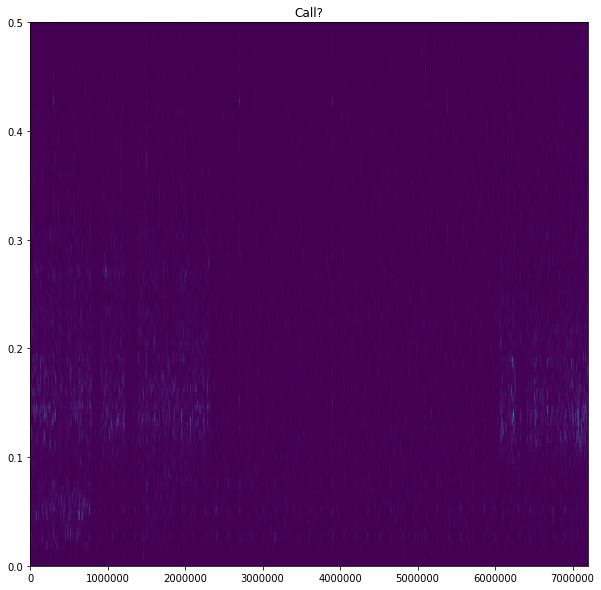

In [31]:
from scipy import signal

plt.figure(figsize=(10, 10))
f, t, sxx = signal.spectrogram(data, window = 'blackman')
plt.title('Call?')
plt.pcolormesh(t, f, sxx)

In [30]:
ps.shape

(128, 14063)

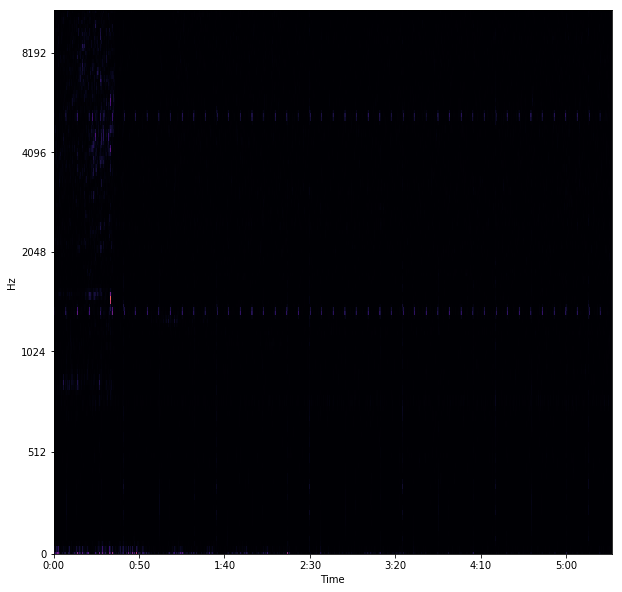

In [20]:
import librosa
import librosa.display
plt.figure(figsize=(10,10))
ps = librosa.feature.melspectrogram(y=data.astype(float), sr=fs, fmax=128)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

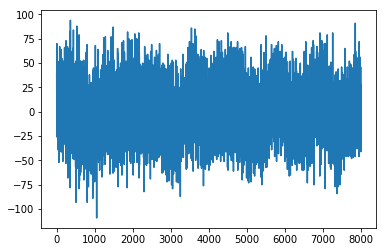

In [18]:
r_s = 2
random_moment = np.random.randint(r_s*fs, data.shape[0])
random_clip = data[random_moment - r_s*fs: random_moment + r_s*fs]
plt.plot(random_clip)
plt.show()

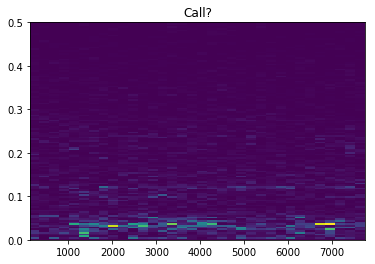

In [12]:
from scipy import signal

f, t, sxx = signal.spectrogram(random_clip)
plt.title('Call?')
plt.pcolormesh(t, f, sxx)

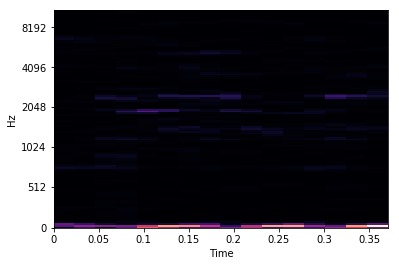

In [13]:
import librosa
import librosa.display
ps = librosa.feature.melspectrogram(y=random_clip.astype(float), sr=fs, fmax=128)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [19]:
data.shape

(805200000,)